 This notebook is a project for the Data Analysis with Python course by IBM on Coursera.

## Part 1- Data Wrangling

The objectives of this section are:

 - Handling missing data
 - Normalizing
 - Visualizing the data as grouped bar graph using Binning
 - Cnverting a categorical data into numerical indicator variables

The following commented lines are used to download the "laptops.csv" file. If the file already exists, there is no need to run the folloing cell.

In [ ]:
# import requests

# URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
# file_name = "laptops.csv"
# response = requests.get(URL)
# with open(file_name, "wb") as f:
#     f.write(response.content)

In [1]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data into a pandas DataFrame
file_name="laptops.csv"
df = pd.read_csv(file_name, header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


The first column is an index from the csv file and can be dropped.

In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)

### Evaluating the dataset for missing data

In [4]:
missing_data_df = df.isnull()
# for column in missing_data.columns.values.tolist():
for column in missing_data_df.columns:
    entry_count = missing_data_df[column].value_counts().iloc[0]
    if entry_count != missing_data_df.shape[0]:
        print(column, "\t", missing_data_df.shape[0] - entry_count, "missing value(s)")

Screen_Size_cm 	 4 missing value(s)
Weight_kg 	 5 missing value(s)


In [5]:
# Checking if the dtype of these columns is float
df[["Screen_Size_cm", "Weight_kg"]].dtypes

Screen_Size_cm    float64
Weight_kg         float64
dtype: object

Values in "Weight_kg" attribute are continuous in nature. The missing values are replaced by the average value of the attribute.

In [6]:
df["Weight_kg"].replace(np.nan, df["Weight_kg"].mean(), inplace=True)

Missing values in attributes that have categorical data, such as "Screen_Size_cm", are best replaced using the most frequent value.

In [7]:
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)

### Data Normalization

In [8]:
# Normalizing the "CPU_frequency" attribute with respect to the maximum value
print(df["CPU_frequency"].dtypes)
df["CPU_frequency"] = df["CPU_frequency"] / df["CPU_frequency"].max()

float64


### Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. The attribute price is considered in 3 bins, named "Low", "Medium" and "High". The new attribute will be named "Price-binned".

In [9]:
print(df["Price"].dtypes)
# price_bins = np.linspace(df["Price"].min(), df["Price"].max(), 4)
# group_names = ['Low', 'Medium', 'High']
# df['Price-binned'] = pd.cut(df['Price'], price_bins, labels=group_names, include_lowest=True )
df.head()

int64


,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,0.551724,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,0.689655,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,0.931034,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,0.551724,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,0.620690,8,256,1.91,837


In [ ]:
# plt.bar(group_names, df["Price-binned"].value_counts())
# plt.xlabel("Price")
# plt.ylabel("count")
# plt.title("Price bins")

Converting the "Screen" attribute into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD".

In [10]:
dummy = pd.get_dummies(df["Screen"])
dummy.rename(columns={'IPS Panel': 'Screen-IPS_panel', 'Full HD': 'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy], axis=1)
df.drop("Screen", axis = 1, inplace=True)
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,35.560,0.551724,8,256,1.60,978,False,True
1,Dell,3,1,1,3,39.624,0.689655,4,256,2.20,634,True,False
2,Dell,3,1,1,7,39.624,0.931034,8,256,2.20,946,True,False
3,Dell,4,2,1,5,33.782,0.551724,8,128,1.22,1244,False,True
4,HP,4,2,1,7,39.624,0.620690,8,256,1.91,837,True,False


## Part 2- Exploratory Data Analysis

The objectives of this section are:
 - Visualizing individual feature patterns
 - Running descriptive statistical analysis
 - Using groups and pivot tables to find the effect of categorical variables on price
 - Using Pearson Correlation to measure the interdependence between variables

In [12]:
import seaborn as sns
from scipy import stats

# Descriptive Statistical Analysis

In [35]:
print(df.describe())
print(df.describe(include=['object']))

         Category         GPU          OS    CPU_core  Screen_Size_cm  \
count  238.000000  238.000000  238.000000  238.000000      238.000000   
mean     3.205882    2.151261    1.058824    5.630252       37.309185   
std      0.776533    0.638282    0.235790    1.241787        2.961753   
min      1.000000    1.000000    1.000000    3.000000       30.480000   
25%      3.000000    2.000000    1.000000    5.000000       35.560000   
50%      3.000000    2.000000    1.000000    5.000000       38.100000   
75%      4.000000    3.000000    1.000000    7.000000       39.624000   
max      5.000000    3.000000    2.000000    7.000000       43.942000   

       CPU_frequency      RAM_GB  Storage_GB_SSD   Weight_kg        Price  
count     238.000000  238.000000      238.000000  238.000000   238.000000  
mean        0.813822    7.882353      245.781513    1.862232  1462.344538  
std         0.141860    2.482603       34.765316    0.489090   574.607699  
min         0.413793    4.000000      

# Visualizing individual feature patterns
For continuous variables, generating regression plots for "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price".

,CPU_frequency,Screen_Size_cm,Weight_kg,Price
CPU_frequency,1.000000,-0.000948,0.066522,0.366666
Screen_Size_cm,-0.000948,1.000000,0.797534,-0.110644
Weight_kg,0.066522,0.797534,1.000000,-0.050312
Price,0.366666,-0.110644,-0.050312,1.000000


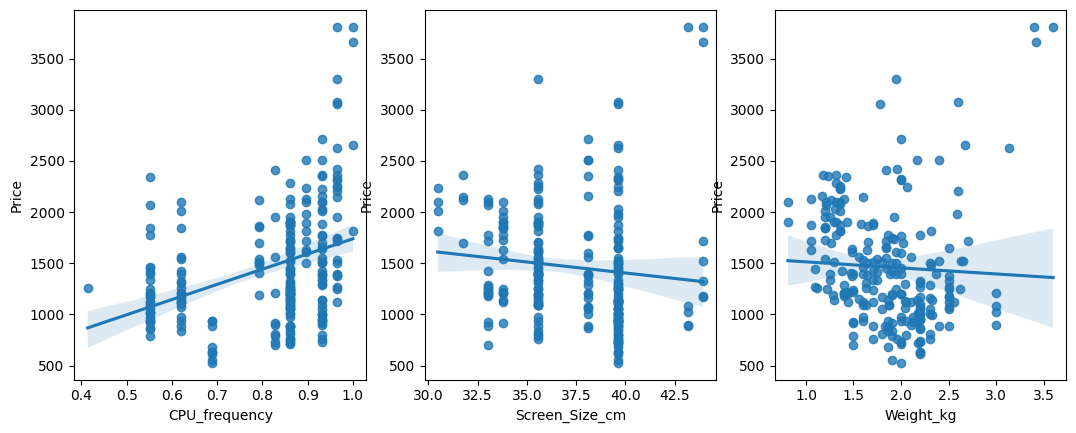

In [23]:
fig, axes = plt.subplots(1, 3)
for k, feature in enumerate(["CPU_frequency", "Screen_Size_cm", "Weight_kg"]):
    sns.regplot(x=feature, y="Price", data=df, ax=axes[k])
fig.set_size_inches([12.8, 4.8])
df[["CPU_frequency", "Screen_Size_cm", "Weight_kg", "Price"]].corr()

"CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


For categorical features, generating Box plots for "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD".

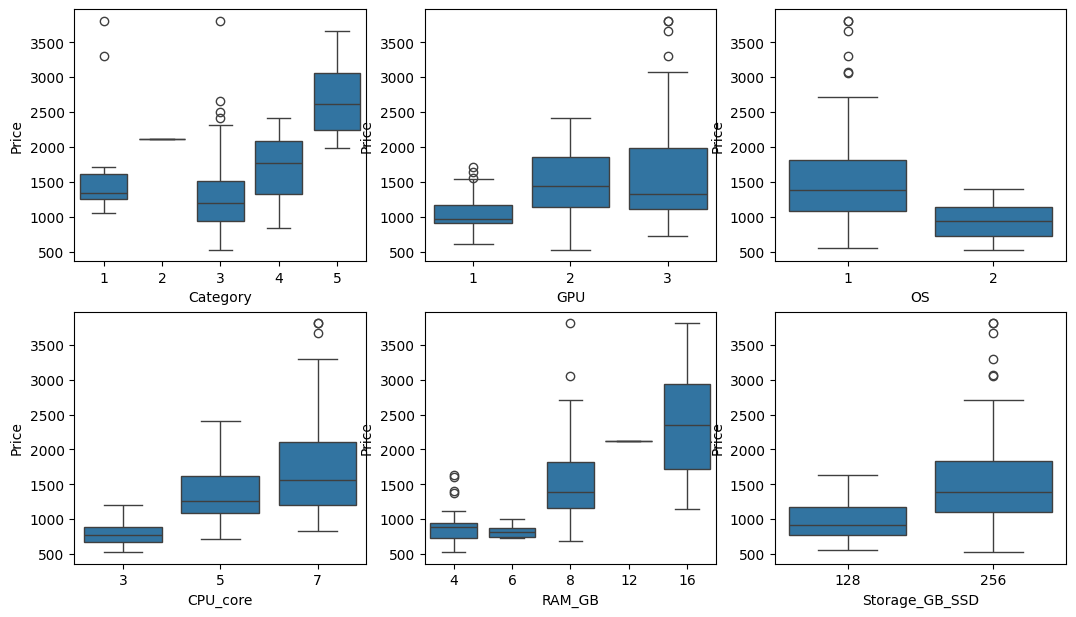

In [34]:
fig, axes = plt.subplots(2, 3)
for k, feature in enumerate(["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]):
    sns.boxplot(x=feature, y="Price", data=df, ax=axes[k//3, np.mod(k, 3)])
fig.set_size_inches([2*6.4, 1.5*4.8])

# GroupBy and Pivot Tables
Grouping "GPU", "CPU_core" and "Price" to make a pivot table and visualizing the connection.

In [41]:
df_grouped = df[["GPU", "CPU_core", "Price"]].groupby(["GPU", "CPU_core"], as_index=False).mean()
df_grouped

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [44]:
grouped_pivot = df_grouped.pivot(index='GPU', columns='CPU_core')
grouped_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

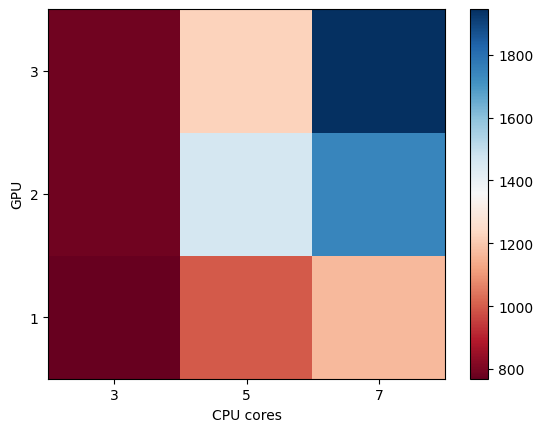

In [84]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
ax.set_xlabel("CPU cores")
ax.set_ylabel("GPU")

fig.colorbar(im)

Evaluating the Pearson Coefficient and the p-values for each parameter to determine the features with most effect on the price

In [91]:
for param in ['Category', 'GPU', 'OS', 'CPU_core', 'Screen_Size_cm', 'CPU_frequency',
              'RAM_GB', 'Storage_GB_SSD', 'Weight_kg', 'Screen-Full_HD']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("Pearson Correlation Coefficient = ", pearson_coef, "\t p-value = ", p_value)
    print()

Category
Pearson Correlation Coefficient =  0.2862427558126411 	 p-value =  7.2256962358084185e-06

GPU
Pearson Correlation Coefficient =  0.28829819888814257 	 p-value =  6.16694969836594e-06

OS
Pearson Correlation Coefficient =  -0.2217298011482737 	 p-value =  0.0005696642559248124

CPU_core
Pearson Correlation Coefficient =  0.4593977773355116 	 p-value =  7.912950127011088e-14

Screen_Size_cm
Pearson Correlation Coefficient =  -0.11064420817118295 	 p-value =  0.0885339784683266

CPU_frequency
Pearson Correlation Coefficient =  0.3666655589258862 	 p-value =  5.502463350714563e-09

RAM_GB
Pearson Correlation Coefficient =  0.5492972971857846 	 p-value =  3.681560628843529e-20

Storage_GB_SSD
Pearson Correlation Coefficient =  0.24342075521810302 	 p-value =  0.00014898923191727792

Weight_kg
Pearson Correlation Coefficient =  -0.05031225837751543 	 p-value =  0.4397693853434932

Screen-Full_HD
Pearson Correlation Coefficient =  -0.021074572471421662 	 p-value =  0.746356830977824